# Quantitative Analysis of Customer Satisfaction Through Online Review Ratings 
# Dataset: Amazon Software Review

This project analyzes customer review ratings to gauge satisfaction and identify improvement areas.\
The findings aim to empower businesses to enhance product offerings and customer service, informed by a data-driven understanding of consumer sentiment.


### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [6]:
# Loading the dataset in chunks
file_path = '../Software.jsonl'
# file_path = './Software_5.json'

#specifying the chunk size and initialization chunk array
chunk_size = 50000  
chunks = []

#filling the chunk array using a for loop
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenating chunks into one DataFrame
data = pd.concat(chunks, ignore_index=True)

In [7]:
# checking the shape of the data 
data.shape

(4880181, 10)

In [8]:
# A preview of the data
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2019-07-03 19:37:12.076,0,False
1,5,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2015-02-16 20:58:56.000,0,True
2,5,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2013-03-04 12:14:27.000,0,True
3,4,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,2019-06-20 20:10:28.662,0,True
4,4,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,2014-12-11 00:19:56.000,0,True


- `rating`: Numeric. Indicates the user's rating of the software product on a scale typically from 1 to 5, where 1 is the lowest (poor) and 5 is the highest (excellent). This reflects the user's overall satisfaction with the product.

- `title`: String. The title of the review, often a short summary or main point that the reviewer wants to emphasize about the software.
- `text`: String. The full text of the user's review, providing detailed feedback, comments, or descriptions of their experience with the software.
- `images`: Array of Strings. Contains links or identifiers for images that the reviewer might have included with their review. This can be useful for visual feedback or proof of issues discussed in the review.
- `asin`: String. The Amazon Standard Identification Number, a unique code assigned to each product sold on Amazon, which in this case refers to the specific software being reviewed.
- `parent_asin`: String. For products that come in variations (such as different versions or editions), the parent ASIN refers to the main product ID under which these variations are grouped.
- `user_id`: String. A unique identifier for the user who posted the review, helping to track reviews by the same user across different products.
- `timestamp`: Numeric or Date. The Unix timestamp or date indicating when the review was posted. This information is crucial for analyzing trends over time or filtering data based on the review period.
- `helpful_vote`: Numeric. Indicates how many other users found this review helpful. This is a metric of the review's perceived usefulness and reliability.
- `verified_purchase`: Boolean. Indicates whether the reviewer purchased the product on Amazon, which is a signal of the review's authenticity. Verified purchase reviews are often considered more trustworthy than reviews where this status is not confirmed.

## Exploratory data analysis (EDA)

### Descriptive Analysis

In [9]:
# information about the features and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880181 entries, 0 to 4880180
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   rating             int64         
 1   title              object        
 2   text               object        
 3   images             object        
 4   asin               object        
 5   parent_asin        object        
 6   user_id            object        
 7   timestamp          datetime64[ns]
 8   helpful_vote       int64         
 9   verified_purchase  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 339.7+ MB


In [10]:
# description numerical features
data.describe()

,rating,timestamp,helpful_vote
count,4.880181e+06,4880181,4.880181e+06
mean,3.935087e+00,2016-08-11 20:56:15.320964864,4.921711e+00
min,1.000000e+00,1999-03-15 04:02:39,-1.000000e+00
25%,3.000000e+00,2014-09-03 01:27:03,0.000000e+00
50%,5.000000e+00,2016-03-19 18:49:49,0.000000e+00
75%,5.000000e+00,2018-08-15 19:51:14.231000064,2.000000e+00
max,5.000000e+00,2023-09-11 02:13:11.515000,1.026700e+04
std,1.451875e+00,NaN,3.516860e+01


### Data Cleaning

In [11]:
# Checking for null values
data.isnull().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

We have no missing values in our dataset

In [12]:
# dropping the image column as it does not have valid values 
data = data.drop(columns='images')

#### Handling Text Data

In [13]:
import re

# Defining a function to clean the text data
def clean_text(text):
    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Removing special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase to maintain consistency
    text = text.lower().strip()
    return text

# Applying the cleaning function to review text
data[['title', 'text']] = data[['title', 'text']].map(clean_text)


#### Handling Date and Time

In [14]:
# Converting timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')

# Extracting year, month, day for separate analysis if needed
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day

data[['timestamp', 'year', 'month', 'day']].head()

,timestamp,year,month,day
0,2019-07-03 19:37:12.076,2019,7,3
1,2015-02-16 20:58:56.000,2015,2,16
2,2013-03-04 12:14:27.000,2013,3,4
3,2019-06-20 20:10:28.662,2019,6,20
4,2014-12-11 00:19:56.000,2014,12,11


#### Converting Emojis to Text

In [15]:
# Installing the emoji library
%pip install emoji

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [16]:
import emoji

# Define a function to convert emojis to text
def convert_emojis_to_text(text):
    return emoji.demojize(text, language='en')

# Apply the function to convert emojis in the text data
data[['title', 'text']] = data[['title', 'text']].apply(convert_emojis_to_text)

C:\Users\Elisha Stanley\AppData\Local\Temp\ipykernel_16052\2438161128.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[['title', 'text']] = data[['title', 'text']].apply(convert_emojis_to_text)


### Outlier Detection and Elimination

In [17]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as any values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = (data['rating'] < (Q1 - 1.5 * IQR)) | (data['rating'] > (Q3 + 1.5 * IQR))

# Summarizing outliers
print("Number of outliers:", outliers.sum())

Number of outliers: 0


#### Ratings Boxplot

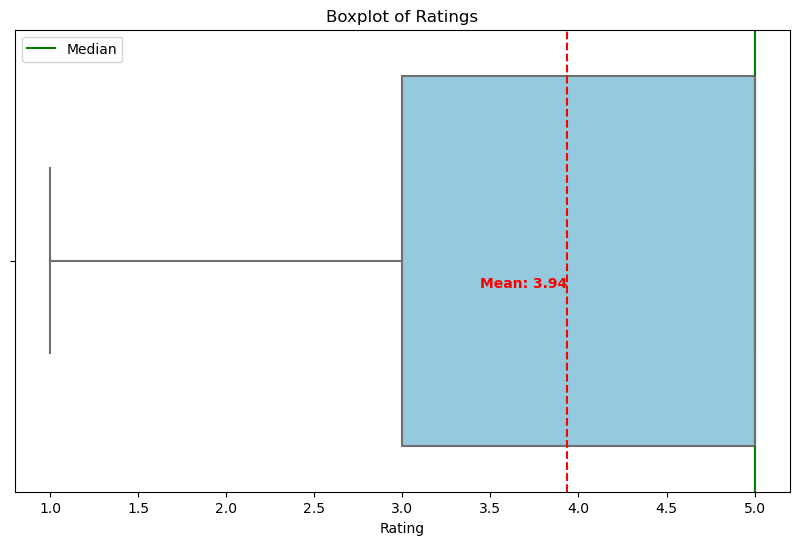

In [18]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
box = sns.boxplot(x=data['rating'], color="skyblue")

# Calculating and plotting the mean as a separate line
mean_value = data['rating'].mean()
plt.axvline(mean_value, color='r', linestyle='--')

# Enhancing median line style
median_value = data['rating'].median()
median_line = plt.axvline(median_value, color='g', linestyle='-')

# Adding more details to the plot
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
# Legend
plt.legend([median_line], ['Median'], loc='upper left')

# Annotating the mean line
plt.text(mean_value, 0.05, f'Mean: {mean_value:.2f}', color = 'r', 
         ha='right', va='center', fontweight='bold')

# Showing the plot
plt.show()

- `Central Tendency`: The median value, denoted by the horizontal line within the box, is positioned towards the upper quartile, indicating a median rating surpassing 4.0. This central measure suggests a predominantly favorable user reception of the software products.

- `Dispersion`: The interquartile range, depicted by the height of the box, is noticeably compact and skewed towards the higher end of the rating spectrum. Such a concentration reveals that the middle 50% of the ratings are closely grouped together, reflecting a consistency in high user satisfaction.
- `Range of Ratings`: The lower whisker extends towards the lower end of the rating scale, which signifies the presence of lesser favorable ratings, although they are relatively infrequent compared to the higher ratings.
- `Outliers`: The absence of marks above the upper boundary of the box indicates a lack of ratings that would be considered exceptionally high outliers. Conversely, the presence of a lower whisker suggests the possibility of lower rating outliers, albeit this is not explicitly marked and, hence, cannot be confirmed without additional data points.
- `Overall Distribution`: The distribution's skew towards higher ratings could imply a tendency among users to submit reviews when experiencing positive satisfaction with the software. Alternatively, this could be an indication of the genuine quality of the products in question.

#### Ratings Histogram

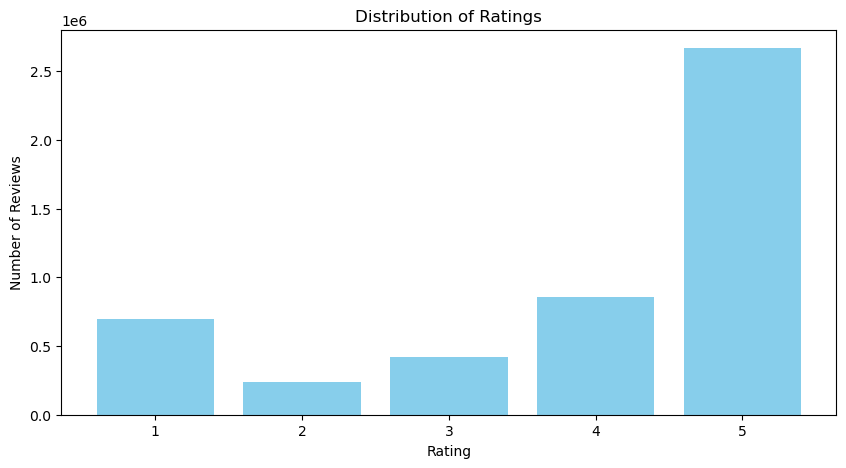

In [19]:
# Calculating distribution of ratings
rating_counts = data['rating'].value_counts().sort_index()

# Plotting the distribution of ratings
plt.figure(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.xticks(np.arange(1, 6))
plt.show()

- `Rating Distribution`: The histogram shows a multimodal distribution of ratings with peaks at each integer value between 1 and 5, which are common rating scales for reviews. The distinct peaks suggest that reviewers tend to favor whole-number ratings over fractional ones.

- `Skewness`: There is a pronounced right (positive) skew in the data, indicated by a steep incline leading up to the 5-rating mark. This suggests that the majority of reviews are highly positive, with a 5-rating being the most frequent.
- `Frequency`: The y-axis represents the frequency of the ratings. The frequency for a 5-rating is significantly higher than for other ratings, as indicated by the sharp peak and the area under the curve at the 5-rating mark.
- `Density Estimate`: The KDE curve follows the shape of the histogram, highlighting the concentration of ratings at integers and showing a smooth progression of the density across the rating spectrum.
- `Potential Outliers`: The ratings of 1, 2, and 3 have notably lower frequencies compared to the ratings of 4 and 5. In a typical review distribution, this could imply that users are less inclined to leave poor ratings, or that the product/service quality is generally good with few negative experiences.
- `Data Volume`: The scale of the frequency axis suggests a large dataset, as the frequency reaches into the millions. This implies the visual represents a substantial amount of review data, which adds robustness to the analysis.
- `Analysis Implications`: For a business or service provider analyzing this data, the distribution is encouraging as it shows a high volume of positive engagement. However, the lower ratings, while less frequent, indicate areas where there may be room for improvement.
<!-- - `Actionable Insights`: The concentration of ratings at the high end may prompt further investigation into what is driving customer satisfaction, so as to reinforce and continue these practices. Conversely, a review of the feedback corresponding to lower ratings could provide critical insights for service or product enhancement. -->

#### Average ratings

In [20]:
# Comparing average rating for verified vs. non-verified purchases
average_rating_verified = data[data['verified_purchase'] == True]['rating'].mean()
average_rating_non_verified = data[data['verified_purchase'] == False]['rating'].mean()

# Display averages
average_rating_verified, average_rating_non_verified

(3.971734971468895, 3.210349084716901)

#### Average Rating for Verified vs. Non-Verified Purchases

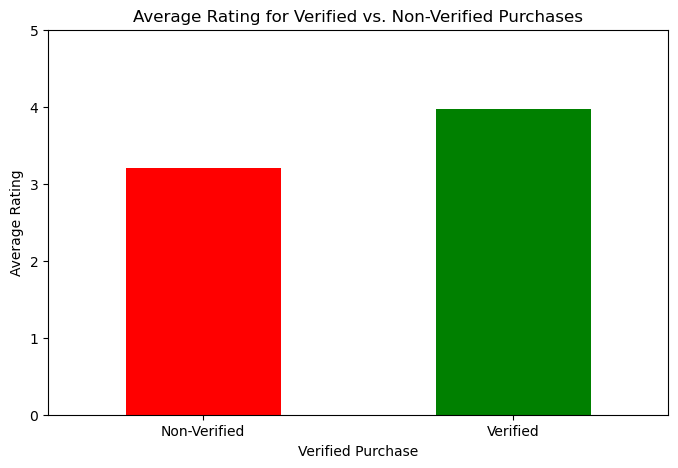

In [21]:
# Grouping data by verification status and calculating the mean rating for each group
grouped_ratings = data.groupby('verified_purchase')['rating'].mean()

# Plotting
plt.figure(figsize=(8, 5))
grouped_ratings.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.title('Average Rating for Verified vs. Non-Verified Purchases')
plt.xticks(ticks=np.arange(2), labels=['Non-Verified', 'Verified'], rotation=0)
plt.ylim(0, 5)  # Setting the limit for better comparison
plt.show()


- Verified purchases generally have a higher average rating (green bar), suggesting a positive correlation between the verification of the purchase and higher customer satisfaction.
- Non-verified purchases show a lower average rating (red bar), which might indicate less satisfaction or potentially less authentic reviews.

#### Verification counts

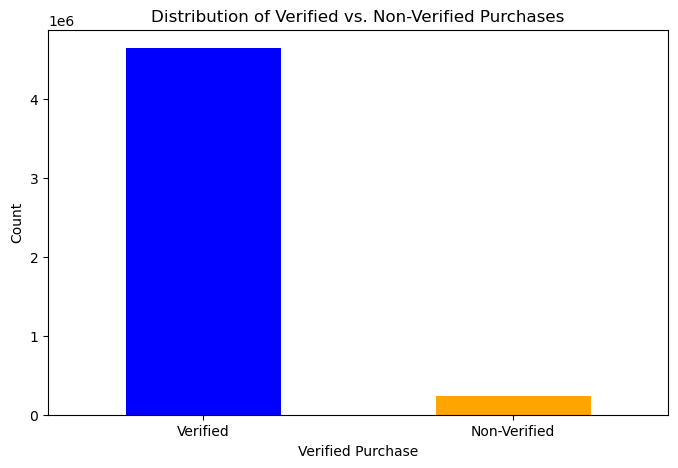

In [22]:
# Counting verified and non-verified purchases
verified_counts = data['verified_purchase'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
verified_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Distribution of Verified vs. Non-Verified Purchases')
plt.xticks(ticks=np.arange(2), labels=['Verified', 'Non-Verified'], rotation=0)
plt.show()

**Key Observations:**

1. **Predominance of Verified Purchases**:
   - The chart shows a dramatic disparity in the count of verified versus non-verified purchases. The bar for verified purchases is significantly higher, indicating a much larger number of reviews come from verified transactions.

2. **Scale**:
   - The vertical axis of the chart is scaled to millions (`1e6`), which underscores the large volume of data handled. This scale highlights that verified purchases far outnumber non-verified ones in this dataset.

3. **Implications for Trustworthiness**:
   - The dominance of verified purchases may suggest that these reviews are more trustworthy, as they can be directly linked to actual transactions. This might influence how potential buyers perceive the credibility of the reviews and, consequently, their purchasing decisions.

4. **Potential Bias in Data Collection**:
   - The overwhelming majority of verified purchases could indicate a bias in either how reviews are collected or how they are prompted by the platform. There might be a system design where verified purchasers are more encouraged or more frequently reminded to leave reviews.

#### Distribution of Verified vs. Non-Verified Purchases

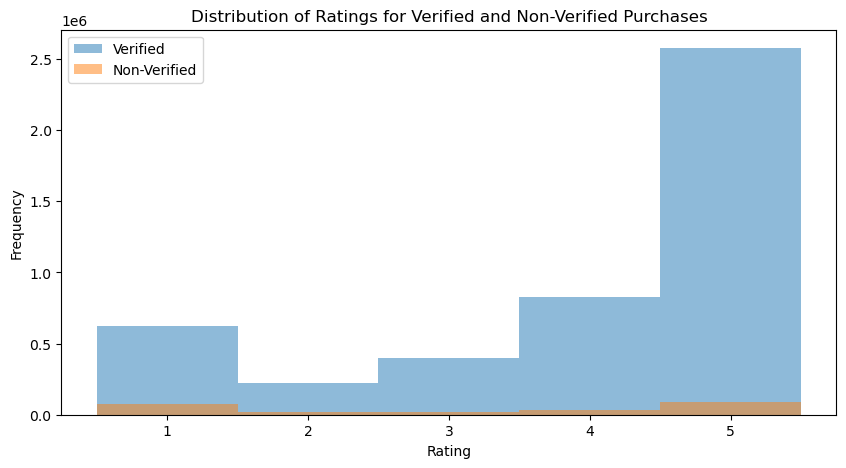

In [23]:
# Creating a histogram of ratings split by verified purchase status
plt.figure(figsize=(10, 5))
for status in [True, False]:
    subset = data[data['verified_purchase'] == status]
    plt.hist(subset['rating'], bins=np.arange(1, 7) - 0.5, alpha=0.5, label=f'{"Verified" if status else "Non-Verified"}')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Verified and Non-Verified Purchases')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.show()


**Key Observations:**

1. **Higher Ratings Predominance**:
   - Both verified and non-verified purchases show a clear preference for higher ratings, with the majority concentrated at the '5' rating level. This indicates a general satisfaction among purchasers regardless of verification status.

2. **Distribution Pattern**:
   - Ratings of '1' and '2' are notably less frequent across both categories, suggesting fewer instances of extreme dissatisfaction.
   - Verified purchases consistently have higher frequencies across all rating levels compared to non-verified purchases, reinforcing the influence of verified buyer feedback in the dataset.

3. **Verification Influence**:
   - The presence of higher counts in all rating categories for verified purchases might reflect the platform's potential bias or user tendency to trust verified reviews more, leading to a greater number of such reviews.

4. **Lower Ratings Analysis**:
   - Non-verified purchases, while lower in frequency across all ratings, show a slightly higher relative presence in the '1' and '2' ratings compared to verified ones. This could suggest either more critical reviews or a potential issue with product experience among non-verified buyers.

#### Monthly Average Ratings

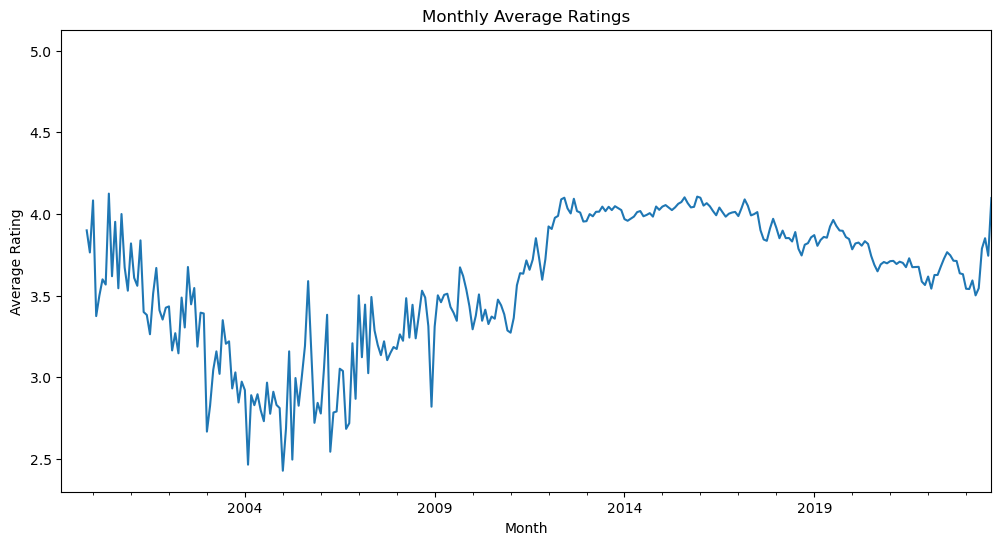

In [24]:
# Converting timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.set_index('timestamp', inplace=True)

# Resampling data by month and calculate the mean rating
monthly_ratings = data['rating'].resample('M').mean()

# Plotting the monthly trend in ratings
plt.figure(figsize=(12, 6))
monthly_ratings.plot(title='Monthly Average Ratings')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()


**Key Observations:**

1. **Initial Volatility**:
   - From 2004 to around 2006, the graph shows significant volatility with ratings peaking and dropping sharply. This could indicate unstable market conditions or changes in consumer expectations during the early years.

2. **Stabilization and Decline**:
   - Post 2006, there is a noticeable stabilization and gradual decline in average ratings, leveling off at around 3.5. This trend continues with minor fluctuations until about 2014, suggesting a period of market maturity or adjusted customer expectations.

3. **Steady State with Recent Recovery**:
   - From 2014 onwards, the ratings stabilize further, showing less variability and maintaining a narrow range around 3.0 to 3.5. Notably, there is a slight recovery in ratings observed towards the end of the timeline, around 2023-2024, possibly due to new initiatives, product improvements, or changes in consumer behavior.

**Implications:**

- **Consumer Satisfaction**:
  - The overall decline in average ratings over the years might suggest a decrease in consumer satisfaction or rising expectations that are not being met by current offerings.
  
- **Market Dynamics**:
  - Initial fluctuations could be tied to market entry phases, product line changes, or shifts in consumer demographics that took time to stabilize.

- **Quality and Service Adjustments**:
  - The gradual increase in ratings near the current date could suggest effective adjustments in quality, customer service, or product alignment with consumer needs.

#### Seasonal Plot of Monthly Average Ratings for 2023

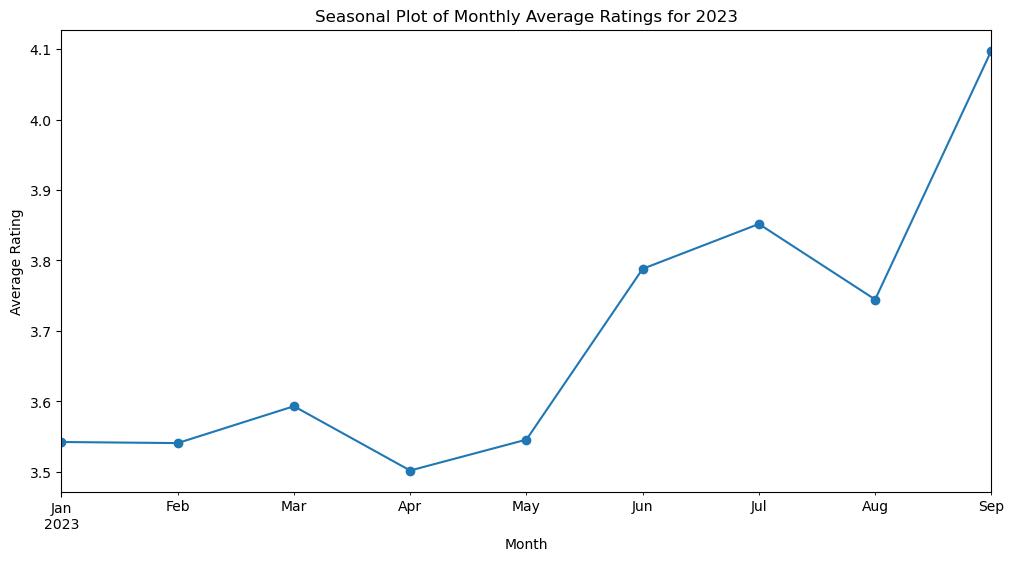

In [25]:
# Finding the latest full year available in your dataset
latest_year = data.index.year.max()

# Filtering the data for the latest complete year
year_data = data[data.index.year == latest_year]

# Resampling by month and calculate average rating
monthly_ratings = year_data['rating'].resample('M').mean()

# Plotting a seasonal plot for the latest complete year
plt.figure(figsize=(12, 6))
monthly_ratings.plot(style='-o')
plt.title(f'Seasonal Plot of Monthly Average Ratings for {latest_year}')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

**Key Observations:**

1. **General Trend**:
   - The ratings start relatively lower in January at around 3.6 and show a significant increase by September reaching up to 4.1. This suggests a positive trend in customer ratings as the year progresses.

2. **Mid-Year Dip**:
   - Notably, there is a dip in the ratings around May to July, with ratings dropping to their lowest at around 3.6 in July before beginning to recover.

3. **End of Summer Recovery**:
   - Post-July, there is a sharp increase in ratings, peaking in September. This spike could be associated with seasonal factors such as new product launches, end of summer sales, or other marketing campaigns that typically occur in this period.

**Implications:**

- **Consumer Engagement**:
  - The increase in ratings towards the end of the year might indicate enhanced customer engagement or satisfaction due to various factors, possibly including improved service, product offerings, or promotional activities.

- **Strategic Planning**:
  - Understanding these trends can help businesses in strategic planning for marketing, stock allocation, and customer service enhancements to maximize customer satisfaction and engagement during specific months.

### Monthly counts of verified purchases

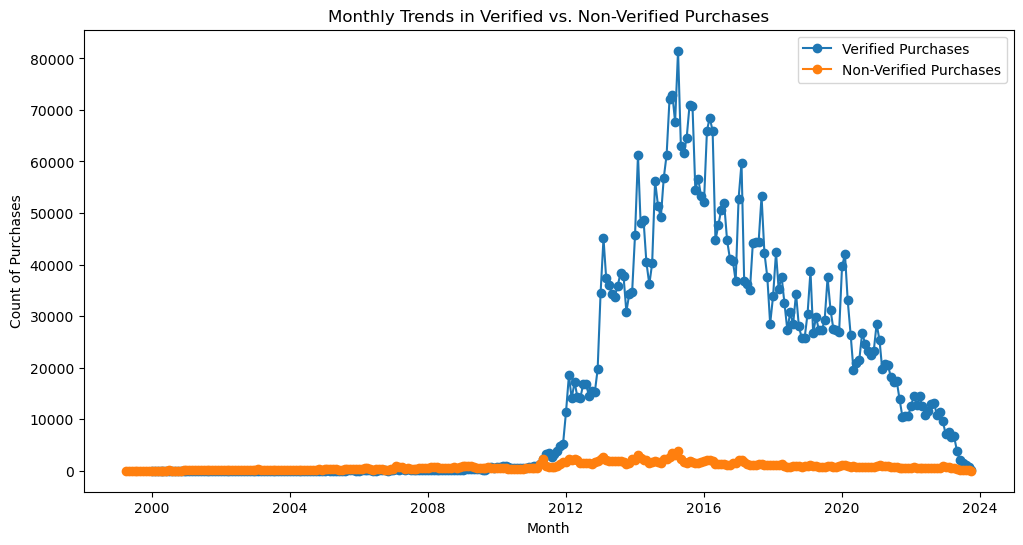

In [26]:
# Resampling to get monthly counts of verified purchases
monthly_verified = data[data['verified_purchase'] == True]['verified_purchase'].resample('M').count()
monthly_non_verified = data[data['verified_purchase'] == False]['verified_purchase'].resample('M').count()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_verified.index, monthly_verified, label='Verified Purchases', marker='o')
plt.plot(monthly_non_verified.index, monthly_non_verified, label='Non-Verified Purchases', marker='o')
plt.title('Monthly Trends in Verified vs. Non-Verified Purchases')
plt.xlabel('Month')
plt.ylabel('Count of Purchases')
plt.legend()
plt.show()

**Key Observations:**

1. **Growth and Decline of Verified Purchases**:
   - The count of verified purchases shows a significant increase starting around 2010, peaking between 2012 and 2016. This suggests a period of active engagement and possibly successful marketing or trust-building strategies that encouraged verified buying.
   - Post-peak, there is a noticeable decline in the count of verified purchases. The decline could be due to market saturation, changes in consumer trust, or alterations in platform policies regarding verification.

2. **Steadiness of Non-Verified Purchases**:
   - Throughout the observed period, non-verified purchases remain consistently low in comparison to verified ones. This could indicate strong platform policies that encourage or require purchase verification for review validity or other benefits.

3. **Recent Trends**:
   - In recent years, specifically post-2020, both verified and non-verified purchases show a decline, with verified purchases dropping more sharply. This trend might be influenced by external factors such as economic downturns, changes in consumer behavior, or increased competition affecting user engagement.

**Implications:**

- **Business Strategy**: The data suggests that strategies to boost verified purchases were effective during the early 2010s but may need adjustment to adapt to the changing market conditions and consumer expectations noted in recent years.

- **Consumer Confidence**: The high volume of verified purchases in certain years may reflect strong consumer confidence in the platform, driven by trust in verification processes. The decline in later years might necessitate initiatives to rebuild consumer trust and engagement.

- **Platform Policy**: The consistent low level of non-verified purchases underlines the effectiveness of platform policies in maintaining a base level of purchase verification, critical for ensuring review authenticity and reliability.